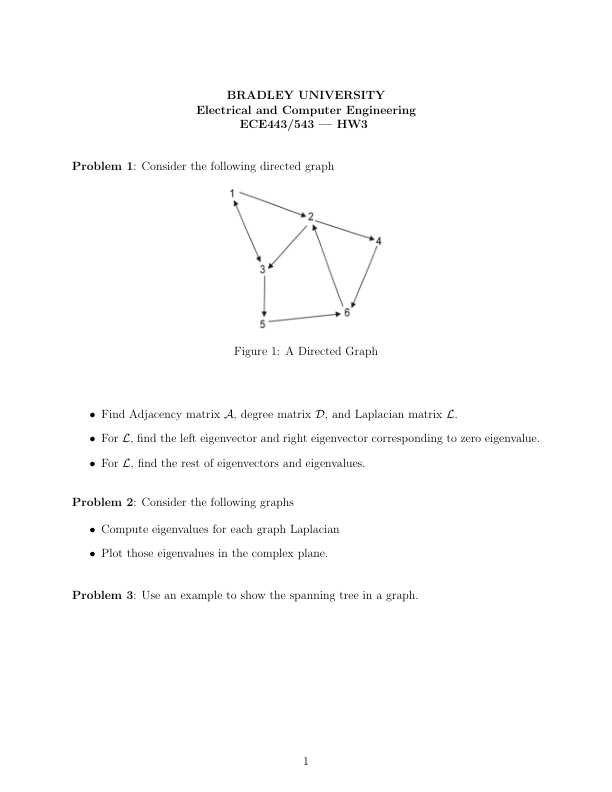

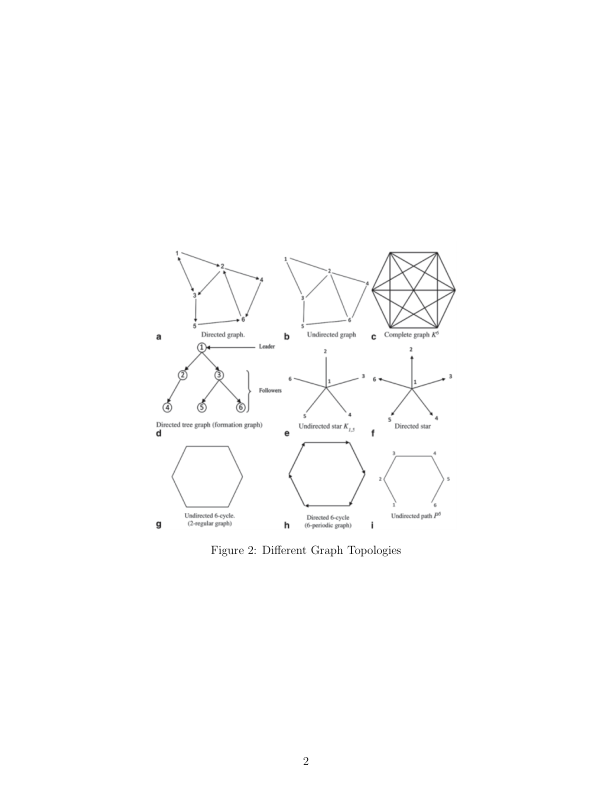

In [1]:
import fitz  # PyMuPDF
from IPython.display import display, Image

def display_pdf_images(pdf_path):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)
    
    # Display each page as an image
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        image_bytes = page.get_pixmap().tobytes()
        display(Image(data=image_bytes))

# Call the function with the path to your PDF file
display_pdf_images("hw3.pdf")

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

# Add all edges
edges = [(1, 2), (2, 4), (4, 6), (6, 2), (2, 3), (3, 5), (5, 6), (1, 3), (3, 1)]
G.add_edges_from(edges)

# Get the adjacency matrix
adj_matrix = nx.adjacency_matrix(G)
adj_array = adj_matrix.toarray()

# Compute eigenvalues and right eigenvectors
eigenvalues, right_eigenvectors = np.linalg.eig(adj_array.T)

# Find the index of the eigenvalue closest to zero
zero_eigenvalue_index = np.argmin(np.abs(eigenvalues))

# Get the corresponding right eigenvector
right_eigenvector_zero = right_eigenvectors[:, zero_eigenvalue_index]

# Compute left eigenvectors
left_eigenvalues, left_eigenvectors = np.linalg.eig(adj_array.T)

# Get the left eigenvector corresponding to the zero eigenvalue
left_eigenvector_zero = left_eigenvectors[:, zero_eigenvalue_index]

# Find all other eigenvectors
nonzero_eigenvectors = np.delete(left_eigenvectors, zero_eigenvalue_index, axis=1)

# Print results
print("Right eigenvector corresponding to zero eigenvalue:\n", right_eigenvector_zero, 
      "\n\nLeft eigenvector corresponding to zero eigenvalue:\n", left_eigenvector_zero, 
      "\n\nAll other eigenvectors:\n", nonzero_eigenvectors)

# Draw the graph B with labels
nx.draw(G, with_labels=True)
plt.show()

Right eigenvector corresponding to zero eigenvalue:
 [ 3.88578059e-16+0.j -5.54299165e-17+0.j -3.29184518e-16+0.j
  7.07106781e-01+0.j -7.07106781e-01+0.j -3.49938206e-16+0.j] 

Left eigenvector corresponding to zero eigenvalue:
 [ 3.88578059e-16+0.j -5.54299165e-17+0.j -3.29184518e-16+0.j
  7.07106781e-01+0.j -7.07106781e-01+0.j -3.49938206e-16+0.j] 

All other eigenvectors:
 [[ 3.36502630e-01+0.j         -2.29015028e-01+0.13513106j
  -2.29015028e-01-0.13513106j -3.67538075e-01+0.j
  -5.00000000e-01+0.j        ]
 [ 4.81339506e-01+0.j          5.63993312e-01+0.j
   5.63993312e-01-0.j          2.85582571e-01+0.j
  -9.25185854e-17+0.j        ]
 [ 5.24600829e-01+0.j         -2.31660086e-02-0.30905036j
  -2.31660086e-02+0.30905036j -1.73556239e-01+0.j
   5.00000000e-01+0.j        ]
 [ 3.08752867e-01+0.j         -2.14073173e-01-0.43398158j
  -2.14073173e-01+0.43398158j  6.04774965e-01+0.j
   1.85037171e-16+0.j        ]
 [ 3.36502630e-01+0.j         -2.29015028e-01+0.13513106j
  -2.29015028e

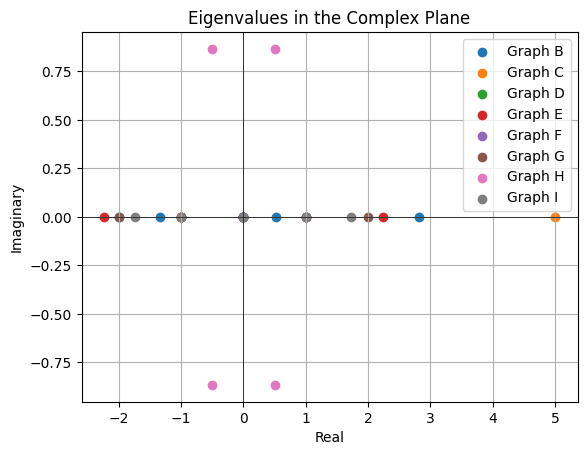

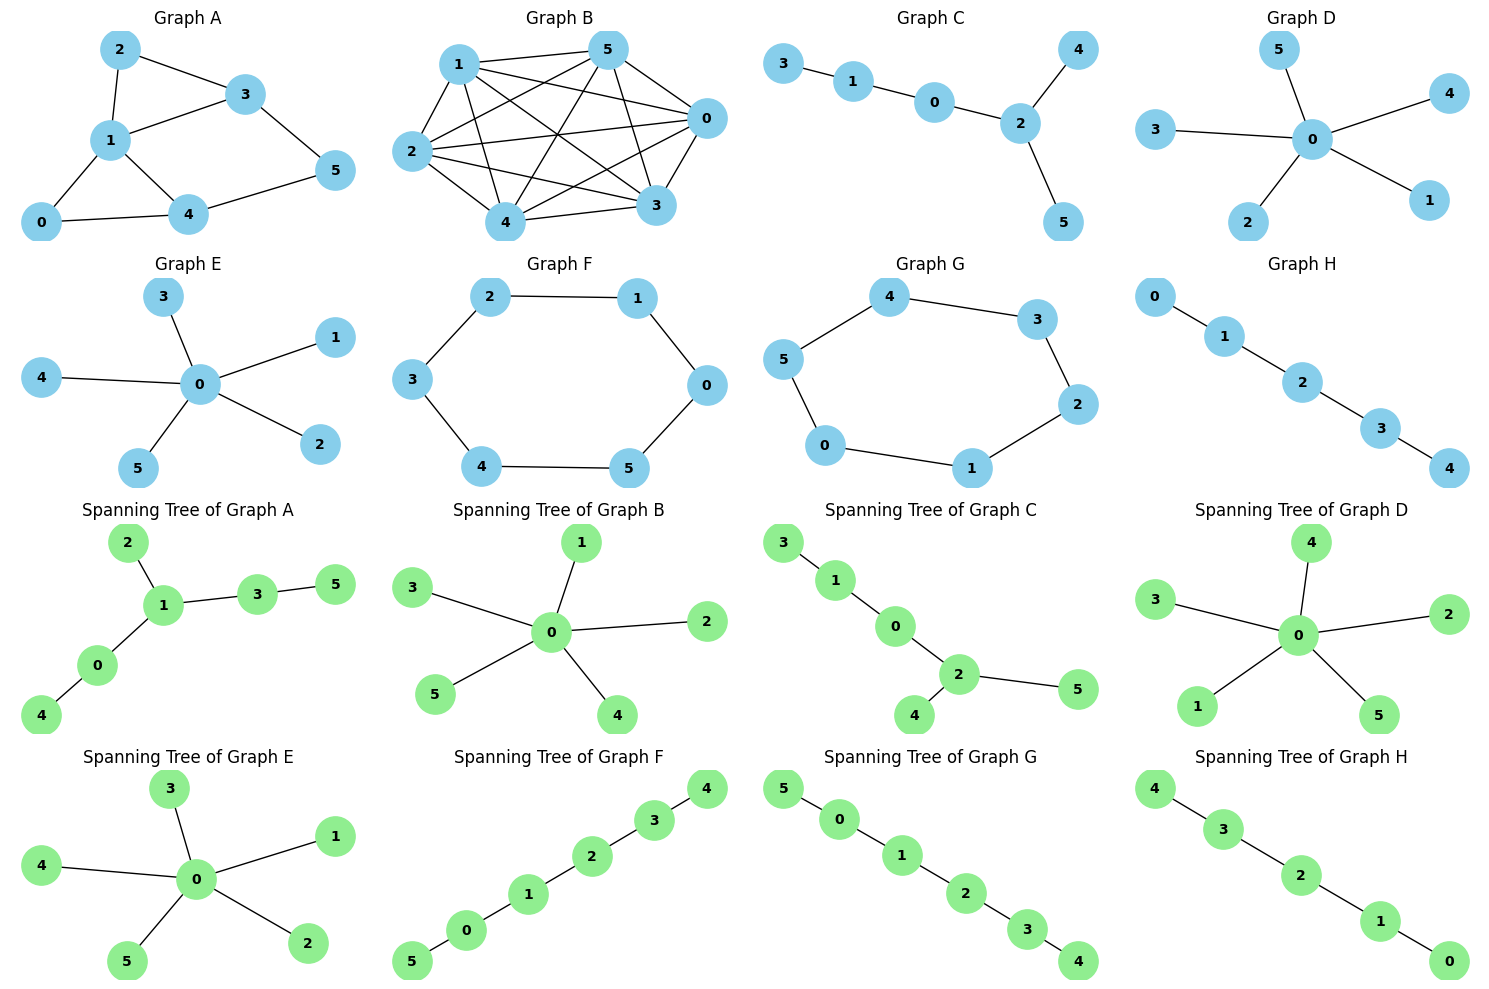

In [11]:
#problem 2

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# List to store eigenvalues for each graph
eigenvalues_list = []

#create undirected Graph
B = nx.Graph()
edges = [(1, 2), (2, 4), (4, 6), (6, 2), (2,3), (3,5), (5,6) , (1,3), (3,1)]
B.add_edges_from(edges)

#create complete Graph
C = nx.complete_graph(6)

#create directed tree Graph
D = nx.DiGraph()
agents = ['1','2','3','4','5','6']
D.add_nodes_from(agents)
edges = [('1','2'),('1','3'),('2','4'),('3','5'),('3','6')]
D.add_edges_from(edges)

#create undiredted star Graph
E = nx.Graph()
E.add_node(1)
peripheral_nodes = [2, 3, 4, 5, 6]
E.add_nodes_from(peripheral_nodes)
edges = [(1, node) for node in peripheral_nodes]
E.add_edges_from(edges)

#create directed Star Graph
F = nx.DiGraph()
F.add_node(1)
peripheral_nodes = [2, 3, 4, 5, 6]
F.add_nodes_from(peripheral_nodes)
edges = [(1, node) for node in peripheral_nodes]
F.add_edges_from(edges)

#create undirected cycle Graph
G = nx.cycle_graph(6)

#Create directed cycle Graph
H = nx.DiGraph()
H.add_nodes_from(range(1, 7))
for i in range(1, 6):
    H.add_edge(i, i + 1)
H.add_edge(6, 1)

#create undirected path Graph
I = nx.path_graph(5)

#now lets find the eigenvalues for each of the graphs
graphs = [B, C, D, E, F, G, H, I]

#list to append all eigenvalues
eigenvalues_list = []

#go through all graphs
for graph in graphs:
    A = nx.to_numpy_array(graph)
    eigenvalues = np.linalg.eigvals(A)   #find egen values using ajacency matrix
    eigenvalues_list.append(eigenvalues)

# Plot eigenvalues for each graph in the complex plane
for i, graph in enumerate(graphs,start=1):
    eigenvalues = eigenvalues_list[i-1]
    plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), label=f"Graph {chr(65 + i)}")

# Set plot labels and title
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Eigenvalues in the Complex Plane')

# Add legend
plt.legend()

# Display plot
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


#problem 3

# List of graphs
graphs = [B, C, D, E, F, G, H, I]

# Function to convert adjacency matrix to NetworkX graph
def adjacency_matrix_to_graph(adjacency_matrix):
    G = nx.Graph()
    G.add_nodes_from(range(len(adjacency_matrix)))
    for i in range(len(adjacency_matrix)):
        for j in range(len(adjacency_matrix[i])):
            if adjacency_matrix[i][j] != 0:
                G.add_edge(i, j)
    return G

# List of adjacency matrices
adjacency_matrices = [nx.to_numpy_array(graph) for graph in graphs]

# Generate and plot spanning tree for each graph
plt.figure(figsize=(15, 10))
for i, adjacency_matrix in enumerate(adjacency_matrices, start=1):
    
    G = adjacency_matrix_to_graph(adjacency_matrix)
    spanning_tree = nx.minimum_spanning_tree(G)
    
    plt.subplot(4, 4, i)
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=800, font_size=10, font_weight='bold')
    plt.title(f"Graph {chr(64 + i)}")
    
    plt.subplot(4, 4, i + 8)
    nx.draw(spanning_tree, with_labels=True, node_color='lightgreen', node_size=800, font_size=10, font_weight='bold')
    plt.title(f"Spanning Tree of Graph {chr(64 + i)}")

plt.tight_layout()
plt.show()